In [ ]:
# Insira seu project token aqui

# MARATONA BEHIND THE CODE 2020

## DESAFIO 7 - TNT

<hr>

## Installing Libs

In [ ]:
!pip install scikit-learn --upgrade

In [ ]:
!pip install xgboost --upgrade

In [ ]:
!pip install imblearn --upgrade

In [ ]:
!pip3 install cloudant

<hr>

## Download dos conjuntos de dados em formato .csv

In [1]:
import pandas as pd
from cloudant import Cloudant

In [2]:
u = "d5aed30c-4651-48f7-96bd-bd6030237e2a-bluemix"
p = "cfad465a453fad58b800c37b2393f2cd348e34b2451b0b5d217a7bf001b63fea"
a = "d5aed30c-4651-48f7-96bd-bd6030237e2a-bluemix"
client = Cloudant(u, p, account=a, connect=True, auto_renew=True)

In [3]:
db = client[ "thop-iot" ]

In [4]:
response = db.all_docs(include_docs=True)

docs = []
for r in response['rows']:
    docs.append(r['doc'])
type(docs)

list

In [5]:
# Insira aqui o pandasDataFrame.
df = pd.DataFrame(data=docs)

df["LAT"] = df["LAT"].astype(float)
df["LONG"] = df["LONG"].astype(float)

df.head()

,_id,_rev,Tempo,Estação,LAT,LONG,Movimentação,Original_473,Original_269,Zero,...,Tangerina,Citrus,Açaí-Guaraná,Pêssego,TARGET,row,topic,payload,qos,retain
0,000ac62b7850525df9febd4a670e232e,1-6b1e474a57f306eee38b93d5acb6a3cb,2018-5-18,Trianon-Masp,-23.5634,-46.6544,45104,34,62,27,...,13,36,13,29,NORMAL,1578.0,NaN,NaN,NaN,NaN
1,000ac62b7850525df9febd4a6713dcd3,1-1b7cc2fea69a48354a3e488bf6207a97,2019-11-30,Tamanduateí,-23.5929,-46.5897,53360,74,49,65,...,37,3,28,16,NORMAL,3570.0,NaN,NaN,NaN,NaN
2,000ac62b7850525df9febd4a671540dc,1-240fe2514c177df92a1e8627a39fcdf5,2019-12-25,Tamanduateí,-23.5929,-46.5897,51358,3,37,30,...,15,43,6,4,REABASTECER,3595.0,NaN,NaN,NaN,NaN
3,000ac62b7850525df9febd4a671a2cd9,1-950bd3e3f0c02b57c0b82013515ac220,2018-3-8,Sé,-23.5500,-46.6333,193499,8,49,65,...,4,19,39,35,NORMAL,3668.0,NaN,NaN,NaN,NaN
4,000ac62b7850525df9febd4a671a76fa,1-fbc82cb0ec755b94613c520249702ceb,2018-11-2,Trianon-Masp,-23.5634,-46.6544,42740,70,18,8,...,31,43,26,3,NORMAL,1742.0,NaN,NaN,NaN,NaN


In [6]:
df.shape

(122416, 21)

In [7]:
df_distinct = df.drop_duplicates("row")

In [8]:
df_distinct.shape

(17010, 21)

In [9]:
df_training_dataset = df_distinct
df_training_dataset.tail()

,_id,_rev,Tempo,Estação,LAT,LONG,Movimentação,Original_473,Original_269,Zero,...,Tangerina,Citrus,Açaí-Guaraná,Pêssego,TARGET,row,topic,payload,qos,retain
117007,f3ec24ca5f364afc4fc1a23e957cdd5e,1-676742f150d6de5250ef3ebd33235970,2018-12-6,Brigadeiro,-23.5683,-46.6482,47873,25,35,6,...,23,29,15,40,NORMAL,1056.0,NaN,NaN,NaN,NaN
118452,f7973bfbf1c9726a371bc988e40a8e1a,1-4a8023f084a4fd4453f5a50b85a74301,2019-2-19,Brooklin,-23.6263,-46.6878,26301,13,36,53,...,43,25,18,26,NORMAL,14809.0,NaN,NaN,NaN,NaN
118697,f801263354b775a77abdf22580ae5bce,1-6d055c70dc72fe22bb2f72d40b21f354,2018-11-11,Sé,-23.5500,-46.6333,193270,8,25,49,...,38,32,11,36,REABASTECER,3911.0,NaN,NaN,NaN,NaN
121563,fe8fe011ad1ca5c55c7d24831559b74c,1-32b6ed4439995bfc588751256a0bbdcd,2018-2-20,Eucaliptos,-23.6100,-46.6686,24502,44,17,0,...,17,22,10,17,REABASTECER,15890.0,NaN,NaN,NaN,NaN
122398,ffa585d17afd4af1f818b16265b2d654,1-ea08432ad049096c56281e0c22a61b9b,2019-8-6,Campo Belo,-23.6188,-46.6823,24573,28,55,65,...,31,28,39,15,NORMAL,15696.0,NaN,NaN,NaN,NaN


In [10]:
df_training_dataset.to_csv("dataset.csv", index=False)

Sobre o arquivo "training_dataset.csv", temos algumas informações gerais sobre os usuários do app do BanCoppel:

**Tempo**

**Estação**

**LAT**

**LONG**

**Movimentação**

**Original_473**

**Original_269**

**Zero**

**Maçã-Verde**

**Tangerina**

**Citrus**

**Açaí-Guaraná**

**Pêssego**

**TARGET**

In [11]:
df_training_dataset = df_training_dataset.sort_values("row")
df_training_dataset = df_training_dataset[["Tempo", "Estação", "LAT", "LONG", "Movimentação", "Original_473",
                                          "Original_269", "Zero", "Maçã-Verde", "Tangerina", "Citrus", "Açaí-Guaraná",
                                          "Pêssego", "TARGET"]]
df_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17010 entries, 34416 to 12723
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tempo         17009 non-null  object 
 1   Estação       17009 non-null  object 
 2   LAT           17009 non-null  float64
 3   LONG          17009 non-null  float64
 4   Movimentação  17009 non-null  object 
 5   Original_473  17009 non-null  object 
 6   Original_269  17009 non-null  object 
 7   Zero          17009 non-null  object 
 8   Maçã-Verde    17009 non-null  object 
 9   Tangerina     17009 non-null  object 
 10  Citrus        17009 non-null  object 
 11  Açaí-Guaraná  17009 non-null  object 
 12  Pêssego       17009 non-null  object 
 13  TARGET        17009 non-null  object 
dtypes: float64(2), object(12)
memory usage: 1.9+ MB


In [12]:
df_training_dataset.nunique()

Tempo             720
Estação            25
LAT                25
LONG               25
Movimentação    14866
Original_473       81
Original_269       65
Zero               63
Maçã-Verde         43
Tangerina          42
Citrus             43
Açaí-Guaraná       42
Pêssego            42
TARGET              2
dtype: int64

<hr>

## Detalhamento do desafio: classificação binária

Este é um desafio cujo objetivo de negócio é a segmentação dos usuários de aplicativo de um banco. Para tal, podemos utilizar duas abordagens: aprendizado de máquina supervisionado (classificação) ou não-supervisionado (clustering). Neste desafio será aplicada a classificação, pois é disponível um dataset já com "labels", ou em outras palavras, já com exemplos de dados juntamente com a variável alvo.

Na biblioteca scikit-learn temos diversos algoritmos para classificação. O participante é livre para utilizar o framework que desejar para completar esse desafio.

Neste notebook será mostrado um exeplo de uso do algoritmo "Decision Tree" para classificar parte dos estudantes em seis diferentes perfís.

# Atenção!

A coluna-alvo neste desafio é a coluna ``TARGET``

<hr>

## Pre-processando o dataset antes do treinamento

### Processando valores NaN com o SimpleImputer do sklearn

Para os valores NaN, usaremos a substituição pela constante 0 como **exemplo**.

Você pode escolher a estratégia que achar melhor para tratar os valores nulos :)

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html?highlight=simpleimputer#sklearn.impute.SimpleImputer

In [13]:
from sklearn.impute import SimpleImputer
import numpy as np


impute_zeros = SimpleImputer(
    missing_values=np.nan,
    strategy='constant',
    fill_value=0,
    verbose=0,
    copy=True
)

In [14]:
# Exibindo os dados ausentes do conjunto de dados antes da primeira transformação (df)
print("Valores nulos no df_training_dataset antes da transformação SimpleImputer: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

# Aplicando a transformação ``SimpleImputer`` no conjunto de dados base
impute_zeros.fit(X=df_training_dataset)

# Reconstruindo um Pandas DataFrame com os resultados
df_training_dataset_imputed = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_training_dataset
    ),
    columns=df_training_dataset.columns
)

# Eliminar linha com zero
df_training_dataset_imputed = df_training_dataset_imputed[(df_training_dataset_imputed[["Estação", "Tempo"]] != 0).all(axis=1)]

# Exibindo os dados ausentes do conjunto de dados após a primeira transformação (df)
print("Valores nulos no df_training_dataset após a transformação SimpleImputer: \n\n{}\n".format(df_training_dataset_imputed.isnull().sum(axis = 0)))

Valores nulos no df_training_dataset antes da transformação SimpleImputer: 

Tempo           1
Estação         1
LAT             1
LONG            1
Movimentação    1
Original_473    1
Original_269    1
Zero            1
Maçã-Verde      1
Tangerina       1
Citrus          1
Açaí-Guaraná    1
Pêssego         1
TARGET          1
dtype: int64

Valores nulos no df_training_dataset após a transformação SimpleImputer: 

Tempo           0
Estação         0
LAT             0
LONG            0
Movimentação    0
Original_473    0
Original_269    0
Zero            0
Maçã-Verde      0
Tangerina       0
Citrus          0
Açaí-Guaraná    0
Pêssego         0
TARGET          0
dtype: int64



### Eliminando colunas indesejadas

Vamos **demonstrar** abaixo como usar o método **DataFrame.drop()**.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [15]:
df_training_dataset_imputed.tail()

,Tempo,Estação,LAT,LONG,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,TARGET
17004,2019-12-26,Hospital São Paulo,-23.5984,-46.6455,25702,53,54,26,38,23,25,11,37,NORMAL
17005,2019-12-27,Hospital São Paulo,-23.5984,-46.6455,26236,43,52,17,33,18,21,5,35,REABASTECER
17006,2019-12-28,Hospital São Paulo,-23.5984,-46.6455,27174,34,50,9,28,15,16,43,32,NORMAL
17007,2019-12-29,Hospital São Paulo,-23.5984,-46.6455,26877,22,47,65,27,11,16,39,30,NORMAL
17008,2019-12-30,Hospital São Paulo,-23.5984,-46.6455,26759,9,42,56,22,8,10,35,26,NORMAL


In [16]:
df_training_dataset_rmcolumns = df_training_dataset_imputed.drop(columns=['LAT', 'LONG'], inplace=False)

# Atenção!

As colunas removidas acima são apenas para fim de exemplo, você pode usar as colunas que quiser e inclusive criar novas colunas com dados que achar importantes!


### Tratamento de de variáveis categóricas

Como mencionado antes, os computadores não são bons com variáveis "categóricas" (ou strings).

Dado uma coluna com variável categórica, o que podemos realizar é a codificação dessa coluna em múltiplas colunas contendo variáveis binárias. Esse processo é chamado de "one-hot-encoding" ou "dummy encoding". Se você não é familiarizado com esses termos, você pode pesquisar mais sobre isso na internet :)

In [17]:
# Tratando variáveis categóricas com o método Pandas ``get_dummies()''
# df_training = pd.get_dummies(df_training_dataset_rmcolumns, columns=['Variável a ser aplicado método getDumies()'])
# df_training = df_training_dataset_rmcolumns
# df_training.tail()

# Atenção!

A coluna **TARGET** deve ser mantida como uma string. Você não precisa processar/codificar a variável-alvo.

<hr>

## Treinando um classificador com base em uma árvore de decisão

### Selecionando FEATURES e definindo a variável TARGET

In [18]:
df_training_dataset_rmcolumns.tail(20)

,Tempo,Estação,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,TARGET
16989,2019-12-11,Hospital São Paulo,25311,30,14,58,37,38,33,26,13,NORMAL
16990,2019-12-12,Hospital São Paulo,25341,23,8,52,34,34,29,24,7,NORMAL
16991,2019-12-13,Hospital São Paulo,27771,16,65,47,34,30,26,21,2,NORMAL
16992,2019-12-14,Hospital São Paulo,27743,6,57,42,34,25,22,16,43,NORMAL
16993,2019-12-15,Hospital São Paulo,24357,86,49,36,28,22,20,11,41,NORMAL
16994,2019-12-16,Hospital São Paulo,27837,79,46,26,24,20,17,7,36,NORMAL
16995,2019-12-17,Hospital São Paulo,26853,69,38,22,22,18,13,2,31,NORMAL
16996,2019-12-18,Hospital São Paulo,26636,59,34,12,22,16,11,43,25,NORMAL
16997,2019-12-19,Hospital São Paulo,27365,47,30,5,19,11,7,38,22,REABASTECER
16998,2019-12-20,Hospital São Paulo,26406,34,26,65,13,8,2,35,19,NORMAL


In [19]:
df_training_dataset_rmcolumns["Tempo"] = pd.to_datetime(df_training_dataset_rmcolumns["Tempo"], format='%Y-%m-%d', errors='coerce')

In [20]:
df_training_dataset_rmcolumns.head()

,Tempo,Estação,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,TARGET
0,2018-01-01,Paraíso,70277,86,65,65,43,43,43,43,43,NORMAL
1,2018-01-02,Paraíso,73302,73,58,58,38,37,42,41,39,NORMAL
2,2018-01-03,Paraíso,71711,64,50,50,33,34,42,39,35,NORMAL
3,2018-01-04,Paraíso,71740,52,48,42,27,29,36,37,32,NORMAL
4,2018-01-05,Paraíso,71035,41,40,32,21,23,36,34,26,NORMAL


In [21]:
df_training_dataset_rmcolumns["Movimentação"] = df_training_dataset_rmcolumns["Movimentação"].astype(int)

df_training_dataset_rmcolumns["LAST_MOV"] = df_training_dataset_rmcolumns.groupby(['Estação'])['Movimentação'].shift()
df_training_dataset_rmcolumns["DIFF_LAST_MOV"] = df_training_dataset_rmcolumns.groupby(['Estação'])["LAST_MOV"].diff()

df_training_dataset_rmcolumns["MIN_PROD"] = df_training_dataset_rmcolumns[["Original_473", "Original_269", "Zero", "Maçã-Verde", "Tangerina", "Citrus", "Açaí-Guaraná", "Pêssego"]].min(axis = 1, skipna = True) 
df_training_dataset_rmcolumns["DIFF_MIN_PROD"] = df_training_dataset_rmcolumns[["MIN_PROD"]].diff().diff()

df_training_dataset_rmcolumns.tail()

,Tempo,Estação,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,TARGET,LAST_MOV,DIFF_LAST_MOV,MIN_PROD,DIFF_MIN_PROD
17004,2019-12-26,Hospital São Paulo,25702,53,54,26,38,23,25,11,37,NORMAL,25250.0,-1117.0,11.0,-2.0
17005,2019-12-27,Hospital São Paulo,26236,43,52,17,33,18,21,5,35,REABASTECER,25702.0,452.0,17.0,12.0
17006,2019-12-28,Hospital São Paulo,27174,34,50,9,28,15,16,43,32,NORMAL,26236.0,534.0,15.0,-8.0
17007,2019-12-29,Hospital São Paulo,26877,22,47,65,27,11,16,39,30,NORMAL,27174.0,938.0,11.0,-2.0
17008,2019-12-30,Hospital São Paulo,26759,9,42,56,22,8,10,35,26,NORMAL,26877.0,-297.0,10.0,3.0


In [22]:
df_training_dataset_rmcolumns["Original_473"] = df_training_dataset_rmcolumns["Original_473"].astype(int)
df_training_dataset_rmcolumns["Original_269"] = df_training_dataset_rmcolumns["Original_269"].astype(int)
df_training_dataset_rmcolumns["Zero"] = df_training_dataset_rmcolumns["Zero"].astype(int)
df_training_dataset_rmcolumns["Maçã-Verde"] = df_training_dataset_rmcolumns["Maçã-Verde"].astype(int)
df_training_dataset_rmcolumns["Tangerina"] = df_training_dataset_rmcolumns["Tangerina"].astype(int)
df_training_dataset_rmcolumns["Citrus"] = df_training_dataset_rmcolumns["Citrus"].astype(int)
df_training_dataset_rmcolumns["Açaí-Guaraná"] = df_training_dataset_rmcolumns["Açaí-Guaraná"].astype(int)
df_training_dataset_rmcolumns["Pêssego"] = df_training_dataset_rmcolumns["Pêssego"].astype(int)

df_training_dataset_rmcolumns["Estação"] = df_training_dataset_rmcolumns["Estação"].astype("category")

In [23]:
df_training = df_training_dataset_rmcolumns.copy()
df_training.columns

Index(['Tempo', 'Estação', 'Movimentação', 'Original_473', 'Original_269',
       'Zero', 'Maçã-Verde', 'Tangerina', 'Citrus', 'Açaí-Guaraná', 'Pêssego',
       'TARGET', 'LAST_MOV', 'DIFF_LAST_MOV', 'MIN_PROD', 'DIFF_MIN_PROD'],
      dtype='object')

In [24]:
df_training.dropna(inplace=True)

In [25]:
features = df_training[
    [
        'Estação', 'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego', 'DIFF_LAST_MOV', 'DIFF_MIN_PROD'
    ]
]
target = df_training['TARGET']  ## NÃO TROQUE O NOME DA VARIÁVEL TARGET.

In [26]:
features.dtypes

Estação          category
Original_473        int64
Original_269        int64
Zero                int64
Maçã-Verde          int64
Tangerina           int64
Citrus              int64
Açaí-Guaraná        int64
Pêssego             int64
DIFF_LAST_MOV     float64
DIFF_MIN_PROD     float64
dtype: object

### Dividindo nosso conjunto de dados em conjuntos de treinamento e teste

In [27]:
from sklearn import preprocessing

num_d = features.select_dtypes(exclude=['category'])

sc = preprocessing.RobustScaler().fit(num_d)
num_d.columns

Index(['Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego', 'DIFF_LAST_MOV', 'DIFF_MIN_PROD'],
      dtype='object')

In [28]:
features[num_d.columns] = sc.transform(num_d)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [29]:
features.head()

,Estação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,DIFF_LAST_MOV,DIFF_MIN_PROD
2,Paraíso,0.395349,0.43750,0.424242,0.428571,0.454545,0.809524,0.681818,0.523810,1.301411,0.166667
3,Paraíso,0.116279,0.37500,0.181818,0.142857,0.227273,0.523810,0.590909,0.380952,-0.672082,-0.166667
4,Paraíso,-0.139535,0.12500,-0.121212,-0.142857,-0.045455,0.523810,0.454545,0.095238,0.020522,0.000000
5,Paraíso,-0.372093,-0.03125,-0.303030,-0.190476,-0.272727,0.476190,0.272727,-0.047619,-0.293288,0.250000
6,Paraíso,-0.534884,-0.21875,-0.515152,-0.476190,-0.363636,0.238095,0.090909,-0.190476,0.874733,-0.083333


In [30]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTENC
# from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=1008)

smc = SMOTENC(categorical_features=[0], random_state=1006)
# smc = SMOTE(random_state=1006)

X_train, y_train = smc.fit_resample(X_train, y_train)

### Treinando uma árvore de decisão

In [31]:
# Método para criar um árvore de decisão
from lightgbm import LGBMClassifier

dtc = LGBMClassifier(learning_rate=0.001, n_estimators=10000)
dtc.fit(X_train, y_train, categorical_feature=["Estação"])
#dtc.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


LGBMClassifier(learning_rate=0.001, n_estimators=10000)

### Fazendo previsões na amostra de teste

In [32]:
y_pred = dtc.predict(X_test)
print(y_pred)

['REABASTECER' 'REABASTECER' 'REABASTECER' ... 'NORMAL' 'REABASTECER'
 'NORMAL']


In [33]:
dtc.feature_importances_

array([22894, 28325, 28996, 28567, 25444, 25264, 28969, 30772, 36701,
       16505, 27563], dtype=int32)

### Analisando a qualidade do modelo através da matriz de confusão

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import itertools


def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(9, 9))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

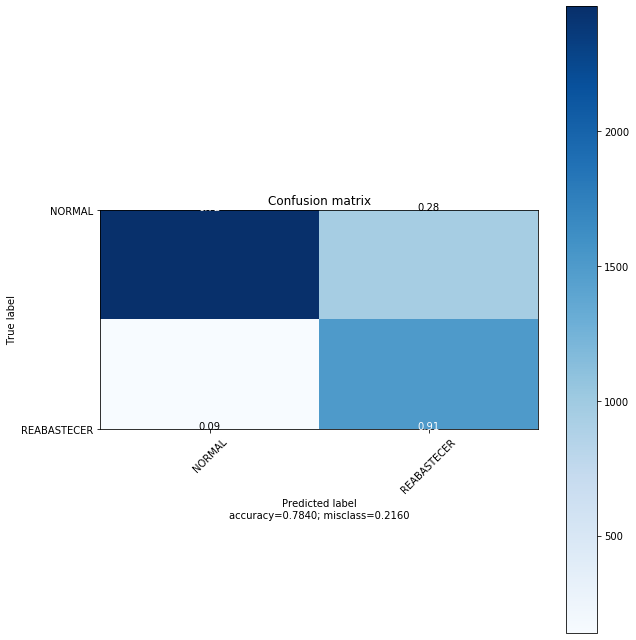

In [35]:
from sklearn.metrics import confusion_matrix


plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['NORMAL', 'REABASTECER'])

In [36]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      NORMAL       0.95      0.72      0.82      3414
 REABASTECER       0.61      0.91      0.73      1646

    accuracy                           0.78      5060
   macro avg       0.78      0.82      0.78      5060
weighted avg       0.84      0.78      0.79      5060



<hr>

## Scoring dos dados necessários para entregar a solução

Como entrega da sua solução, esperamos os resultados classificados no seguinte dataset chamado "to_be_scored.csv":

### Download da "folha de respostas"

In [ ]:
!wget --no-check-certificate --content-disposition https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/ntn/to_be_scored.csv
df_to_be_scored = pd.read_csv(r'to_be_scored.csv')
df_to_be_scored.tail()

In [ ]:
#df_to_be_scored = pd.read_csv('to_be_scored.csv')
#df_to_be_scored.tail()

# Atenção!

O dataframe ``to_be_scored`` é a sua "folha de respostas". Note que a coluna "TARGET" não existe nessa amostra, que não pode ser então utilizada para treino de modelos de aprendizado supervisionado.

In [ ]:
df_to_be_scored.info()

<hr>

# Atenção!

# Para poder aplicar seu modelo e classificar a folha de respostas, você precisa primeiro aplicar as mesmas transformações com colunas que você aplicou no dataset de treino.

# Não remova ou adicione linhas na folha de respostas. 

# Não altere a ordem das linhas na folha de respostas.

# Ao final, as 1000 entradas devem estar classificadas, com os valores previstos em uma coluna chamada "target"

<hr>

Na célula abaixo, repetimos rapidamente os mesmos passos de pré-processamento usados no exemplo dado com árvore de decisão

In [ ]:
# 1 - Removendo linhas com valores NaN
df_to_be_scored_1 = df_to_be_scored.dropna(axis='index', how='any', subset=['Tempo', 'Estação', 'LAT', 'LONG', 'Movimentação', 'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina', 'Citrus', 'Açaí-Guaraná', 'Pêssego'])

# 2 - Inputando zeros nos valores faltantes
impute_zeros.fit(X=df_to_be_scored_1)
df_to_be_scored_2 = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_to_be_scored_1
    ),
    columns=df_to_be_scored_1.columns
)

# 3 - Remoção de colunas
df_to_be_scored_3 = df_to_be_scored_2.drop(columns=['LAT', 'LONG'], inplace=False)

# 4 - Encoding com "dummy variables" (se necessário)
# df_to_be_scored_4 = pd.get_dummies(df_to_be_scored_3, columns=['Váriavel com dummy'])
# df_to_be_scored_4 = df_to_be_scored_3

df_to_be_scored_4 = df_to_be_scored_3.copy()

df_to_be_scored_4["Tempo"] = pd.to_datetime(df_to_be_scored_4["Tempo"], format='%Y-%m-%d', errors='coerce')
df_to_be_scored_4["Workdays"] = np.where(df_to_be_scored_4["Tempo"].dt.dayofweek < 5, "Workday", "Weekend")
df_to_be_scored_4["Estação"] = df_to_be_scored_4["Estação"].astype("category")
df_to_be_scored_4["Workdays"] = df_to_be_scored_4["Workdays"].astype("category")
df_to_be_scored_4["Movimentação"] = df_to_be_scored_4["Movimentação"].astype(int)
df_to_be_scored_4["LAST_MOV"] = df_to_be_scored_4.groupby(['Estação'])['Movimentação'].shift()
df_to_be_scored_4["DIFF_LAST_MOV"] = df_to_be_scored_4.groupby(['Estação'])["LAST_MOV"].diff()
df_to_be_scored_4['LAST_MOV'] = df_to_be_scored_4['LAST_MOV'].fillna(0)
df_to_be_scored_4['DIFF_LAST_MOV'] = df_to_be_scored_4['DIFF_LAST_MOV'].fillna(0)
df_to_be_scored_4.drop(['Tempo', 'Movimentação'], axis='columns', inplace=True)

num_d = df_to_be_scored_4.select_dtypes(exclude=['category'])
sc = preprocessing.StandardScaler().fit(num_d)
df_to_be_scored_4[num_d.columns] = sc.transform(num_d)

In [ ]:
df_to_be_scored_4.tail()

In [ ]:
df_to_be_scored_4.dtypes

<hr>

Pode ser verificado abaixo que as colunas da folha de resposta agora são idênticas às que foram usadas para treinar o modelo:

In [ ]:
df_training[
    [
          'Estação', 'Workdays', 'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego', 'LAST_MOV', 'DIFF_LAST_MOV'
    ]
].columns

In [ ]:
df_to_be_scored_4.columns

# Atenção

Para todas colunas que não existirem no "df_to_be_scored", você pode usar a técnica abaixo para adicioná-las:

In [ ]:
y_pred = dtc.predict(df_to_be_scored_4)
df_to_be_scored_4['TARGET'] = y_pred
df_to_be_scored_4.tail()

### Salvando a folha de respostas como um arquivo .csv para ser submetido

In [ ]:
df_to_be_scored_4.to_csv("results.csv", index=False)

# Atenção

# A execução da célula acima irá criar um novo "data asset" no seu projeto no Watson Studio. Você precisará realizar o download deste arquivo juntamente com este notebook e criar um arquivo zip com os arquivos **results.csv** e **notebook.ipynb** para submissão. (os arquivos devem estar nomeados desta forma)

<hr>

## Parabéns!

Se você já está satisfeito com a sua solução, vá até a página abaixo e envie os arquivos necessários para submissão.

# https://tnt.maratona.dev
